# Первая лабораторная работа
Андрей Алексеевич, группа 20201

In [4]:
import thinkdsp as td

## Задание 1
Загрузить звук с чётко выраженной высотой. Вычислить и распечатать спектр. Использовать фильтры.

Был произведён импорт самого модуля для работы с сигналами.
Импортируем звук игры на духовом инструменте и выделим небольшую часть, в которой высота примерно постоянна

In [5]:
filename = "wavs/23193__kaponja__10trump.wav"
wave = td.read_wave(filename)
wave.make_audio()

In [6]:
start = 3.5
duration = 0.5
segment = wave.segment(start, duration)
segment.make_audio()

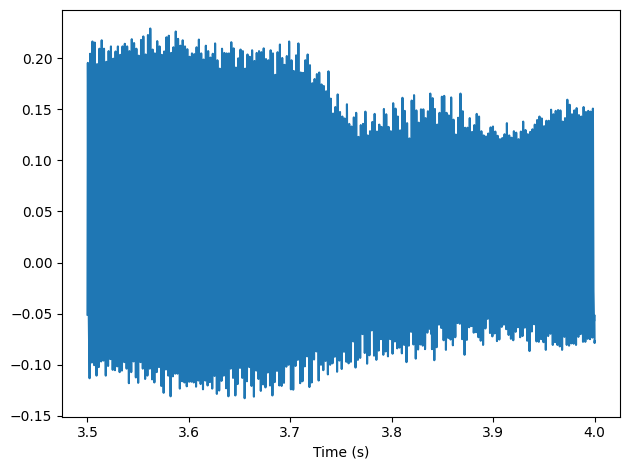

In [7]:
segment.plot()
td.decorate(xlabel='Time (s)')

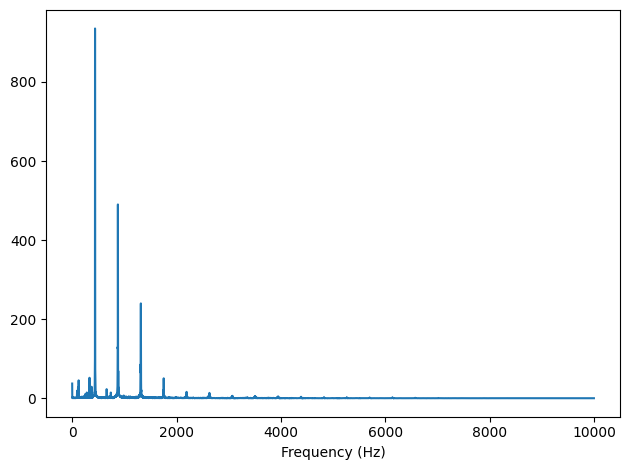

In [8]:
spectrum = segment.make_spectrum()
spectrum.plot(high = 10000)
td.decorate(xlabel = "Frequency (Hz)")

Отфильтруем полученный спектр и обратим его в формат Wave, чтобы послушать новую запись 

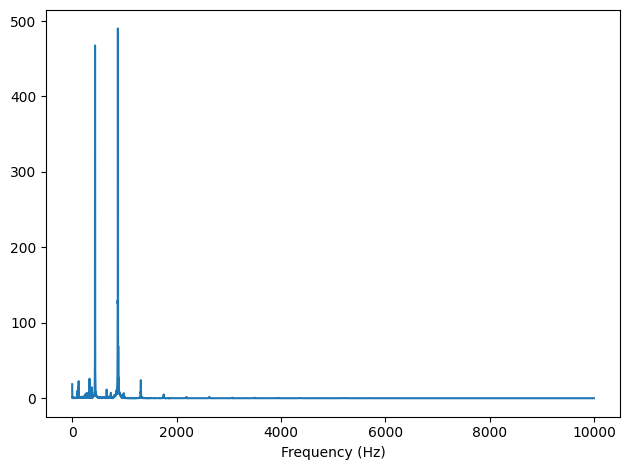

In [9]:
spectrum.low_pass(1000, 0.1)
spectrum.high_pass(800, 0.5)

spectrum.plot(high=10000)
td.decorate(xlabel='Frequency (Hz)')

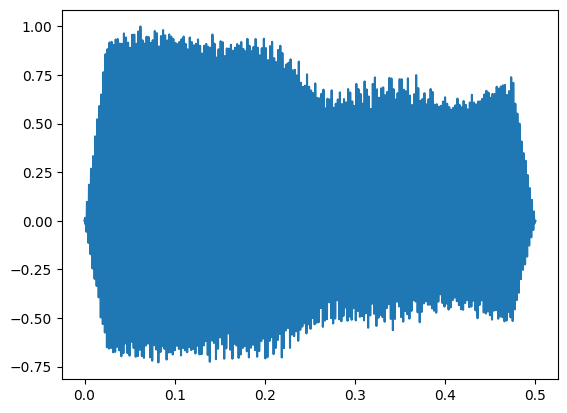

In [10]:
filtered = spectrum.make_wave()
filtered.normalize()
filtered.apodize()
filtered.plot()
filtered.make_audio()

Звук получился более приглушённым и постоянным по громкости

## Задание 2
Создать сложный сигнал

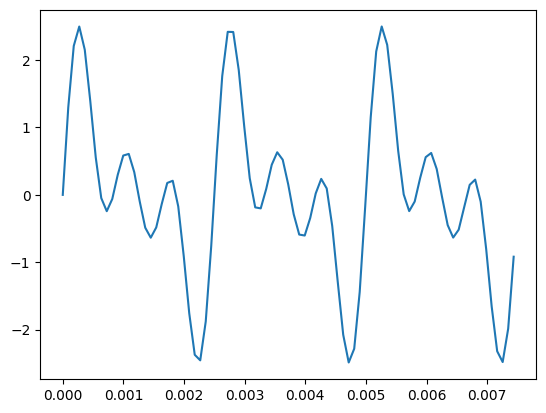

In [11]:
comp_sig = td.SinSignal(freq=400, amp=1.0) + td.SinSignal(freq=800, amp=1.0) + td.SinSignal(freq=1200, amp=1.0)
comp_sig.plot()

In [12]:
comp_sig.make_wave().make_audio()

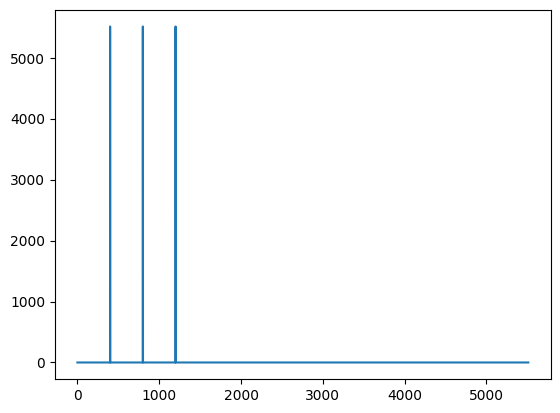

In [13]:
comp_spectrum = comp_sig.make_wave().make_spectrum()
comp_spectrum.plot()

При добавлении ещё одного компонента с частотой, не кратной 400, его можно услышать на фоне 

In [14]:
comp_sig += td.SinSignal(freq=1350, amp=2.0)
comp_sig.make_wave().make_audio()

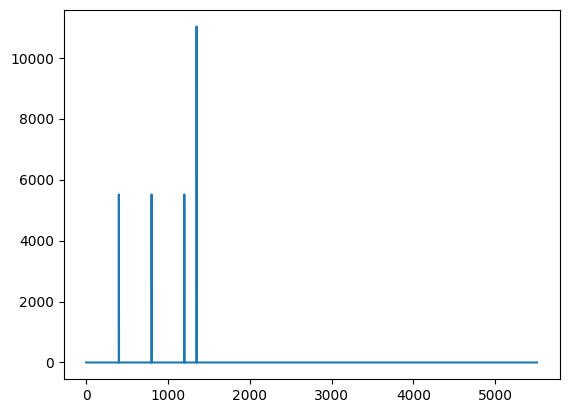

In [15]:
comp_spectrum = comp_sig.make_wave().make_spectrum()
comp_spectrum.plot()

## Задание 3.
Написать функцию `stretch`

Напишем и протестируем функцию ускорения или замедления записи звука на примере первого файла

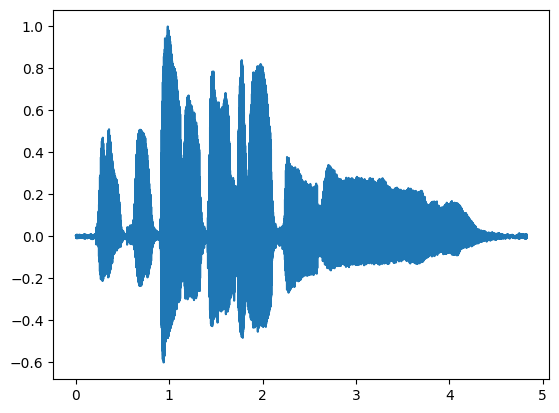

In [17]:
filename = "wavs/23193__kaponja__10trump.wav"
wave = td.read_wave(filename)
wave.plot()

In [18]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

In [19]:
stretch(wave, 0.5)
wave.make_audio()

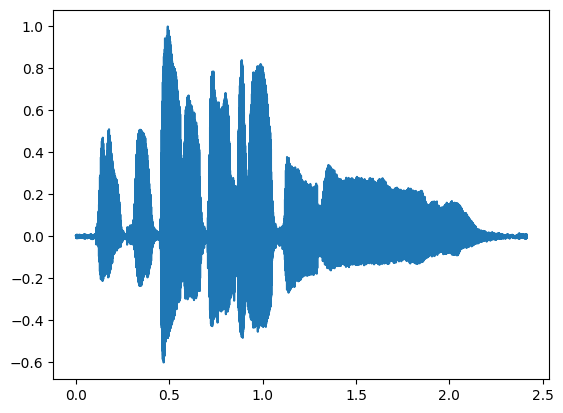

In [20]:
wave.plot()